<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself. We will NOT grade this submissing w/o all the information<br>
<b>Name</b>Krishna Patel <br>
<b>NetID</b>kgp58<br>
<b>Recitation (01/02)</b>02<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b> KP    


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

## CS 439 - Introduction to Data Science
### Fall 2020

# Lab 3: Data Cleaning and Visualization

### Due Date: Sunday October 4, 2020 by 11:59 PM ###

### Instructions
This lab is presented as a notebook. Please execute the cells that are already completed and your task is to fill in the code
between ### BEGIN SOLUTION ### and ### END SOLUTION ###. 

#### Important: Please do not add any new cells or change the order of cells. If you have questions, please contact the courseS staff.

In this lab, you will be working with a dataset from NYPD containing data on calls to the New York Police Department. Information about the datasets can be found https://opendata.cityofnewyork.us/

## Setup

Note that after activating matplotlib to display figures inline via the IPython magic `%matplotlib inline`, we configure a custom default figure size. Virtually every default aspect of matplotlib [can be customized](https://matplotlib.org/users/customizing.html).

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

# Part 1:Getting Data

We will work with the NYPD Historic complaint data set. Our first task is to estimate the size of this download by looking at the number of rows, columns and using an estimated size for a column (use a reasonable value). The site metadata is available from the page
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [ ]:
### BEGIN SOLUTION
estimated size of the download (based on metadata information from the site) = 1.9 GB       
# It is possible that the file is around 2GB because 
## an int64 and float64 takes up around 8 bytes and a datetime would take up around 8 bytes and on average a string (object) type would take around 8 bytes on unicode representation
## having a total of 32 columns an estimate for how much 1 row would take is about 275 bytes. Based on this data it could be estimatated that 196 bytes * 6.98 million would give around 1.4 GB of data 
### END SOLUTION

### 1.1 Download the data
This file is large (use the estimate you did above). If it takes too long to download, you may want to interrupt and download the file using a browser and URL https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [2]:
import utils
data_dir = 'data'
data_url = 'https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i'

file_name = 'NYPD_Complaint_Data_Historic.csv'

# To retrieve the dataset, we will use the `utils.fetch_and_cache` utility from utils library. 
dest_path = utils.fetch_and_cache(data_url=data_url, file=file_name,data_dir=data_dir)
print(f'Located at {dest_path}')

Using version already downloaded: Sat Oct  3 13:27:29 2020
MD5 hash of file: da305a7b7adf6d8c4df9b705565b78bd
Located at data/NYPD_Complaint_Data_Historic.csv


### 1.2 Inspect the size of the file
It is helpful to get an idea of the size of the file. This can be done using functions in the utils library.

In [3]:
# look at the size of the file w/o opening it using OS (https://docs.python.org/3/library/os.html). You can perform
# variety of operating system related functions from this package.
### BEGIN SOLUTION
import os
size = os.path.getsize('data/NYPD_Complaint_Data_Historic.csv')
print(size)

#### END SOLUTION

2218483345


### 1.3 Split the large file
This data file NYPD_Complaint_Data_Historic.csv is too big to load into a single DataFrame. Let us split the large file into smaller files.  Let us find out the number of lines in the NYPD_Complaint_Data_Historic.csv file using utils.

In [4]:
# Using utils library, find the number of lines in the file

### BEGIN SOLUTION

print (utils.line_count('data/NYPD_Complaint_Data_Historic.csv'))

### END SOLUTION

6983208


In [ ]:
# Split the file into 10 smaller files. Estimate the number of lines in each file using the count above
# files should be created in the data folder and named NYPD_Complaint_Data_Historic_1.csv, 
# NYPD_Complaint_Data_Historic_2.csv, ... NYPD_Complaint_Data_Historic_10.csv etc
# It is possible that few lines from the original file may not be saved due to rounding errors.
import itertools
### BEGIN SOLUTION
line_num = utils.line_count('data/NYPD_Complaint_Data_Historic.csv')



sub_line_num = int(np.ceil(float(line_num) / 10)) 


filename = 'data/NYPD_Complaint_Data_Historic.csv'
for i in range(10):
    with open(filename, "r") as f:
        fw = open('data/NYPD_Complaint_Data_Historic_%d.csv' % (i+1), "w")

        sliced_f = itertools.islice(f, i*sub_line_num, min((i+1)*sub_line_num, line_num))  

        for line in sliced_f:
            fw.write(line)

### END SOLUTION

### 1.4 Check the files in the data folder
Now, we'll use a method of the `Pathlib.Path` class called `glob` to list all files in the `data` directory. You will find useful information in pathlib [docs](https://docs.python.org/3/library/pathlib.html).

Below, we use pathlib's `glob` method to store the list of all files' names from the `data_dir` directory in the variable `file_names`. These names should be strings that contain only the file name (e.g. `dummy.txt` not `data/dummy.txt`). The asterisk (*) character is used with the `glob` method to match any string.

In [5]:
from pathlib import Path
data_dir_path = Path('data') # creates a Path object that points to the data directory
file_names = [x.name for x in data_dir_path.glob('*') if x.is_file()]
file_names

['NYPD_Complaint_Data_Historic_10.csv',
 '.DS_Store',
 'NYPD_Complaint_Data_Historic_7.csv',
 'NYPD_Complaint_Data_Historic_6.csv',
 'NYPD_Complaint_Data_Historic.csv',
 'NYPD_Complaint_Data_Historic_4.csv',
 'NYPD_Complaint_Data_Historic_5.csv',
 'NYPD_Complaint_Data_Historic_1.csv',
 'NYPD_Complaint_Data_Historic_2.csv',
 'NYPD_Complaint_Data_Historic_3.csv',
 'NYPD_Complaint_Data_Historic_8.csv',
 'NYPD_Complaint_Data_Historic_9.csv']

### 1.5 Pre-processing of data
It is good to pre-process the data to see if the file can be opened in a Jupyter notebook. We need to avoid large files that can crash notebooks. Typically, files of size around 200 MB is ok to open into a DataFrame. In the following activities we will inspect the file w/o opening it as a DataFrame. Using utils.head 

In [6]:
# Use the util.head() to read up to 5 lines from the original file (w/o opening it)
from utils import head
head('data/NYPD_Complaint_Data_Historic.csv')

['CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX\n',
 '724718389,09/04/2014,17:25:00,09/04/2014,17:35:00,81,09/04/2014,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,COMPLETED,MISDEMEANOR,BROOKLYN,OPPOSITE OF,STREET,N.Y. POLICE DEPT,0,,,NA,1005945,188862,,,,,40.685040958,-73.921776995,"(40.685040958, -73.921776995)",PATROL BORO BKLYN NORTH,,25-44,WHITE,F\n',
 '191133903,10/12/2016,07:40:00,10/12/2016,07:45:00,121,10/12/2016,109,GRAND LARCENY,417,"LARCENY,GRAND FROM PERSON,PURS",COMPLETED,FELONY,STATEN ISLAND,,STREET,N.Y. POLICE DEPT,0,,,NA,947034,171375,UNKNOWN,BLACK,U,,40.63699139,-74.134092508,"(40.63699139, -74.134092508)",PATROL BORO STAT

### 1.6 Inspecting and describing data columns
There should be 35 columns in each record. Using header information and data types, describe the type of data in each
column. If you are unable to determine, just state so.
##### BEGIN SOLUTION
* CMPLNT_NUM : int (complaint number)
* CMPLNT_FR_DT: object (date of incident)
* CMPLNT_FR_TM: time of incident
* CMPLNT_TO_DT: ending date of incidenT
* CMPLNT_TO_TM: ending time of incident
* ADDR_PCT_CD : precinct number of incident 
* RPT_DT : date when incident was reported 
* KY_CD : id of the offense 
* OFNS_DESC : what the offense was 
* PD_CD : PD code
* PD_DESC : description corresponding to the PD Code
* CRM_ATPT_CPTD_CD : outcome of the crime : sucess/ fail etc.. 
* LAW_CAT_CD : level of offense
* BORO_NM : name of borough crime happened 
* LOC_OF_OCCUR_DESC : description of the location where the crime happened 
* PREM_TYP_DESC : premisce description
* JURIS_DESC : jurisdiction code description
* JURISDICTION_CODE : the code of which jurisdiciton is responsible 
* PARKS_NM : park name
* HADEVELOPT : unable to determine
* HOUSING_PSA : Housing development code
* X_COORD_CD : X Coordinate
* Y_COORD_CD : Y Coordinate 
* SUSP_AGE_GROUP : age range  of suspect 
* SUSP_RACE : race of suspect
* SUSP_SEX : sex of suspect
* TRANSIT_DISTRICT : transit district crime happened in
* Latitude : Coordinate for global
* Longitude : Coordinate for global
* Lat_Lon : Combination of Latitude and Longitude
* PATROL_BORO : The patrol borough where crime happened 
* STATION_NAME : name of station
* VIC_AGE_GROUP : age range of victim
* VIC_RACE: Race of victim
* VIC_SEX: Sex of victim 
##### END SOLUTION

# Part 2 - Exploratory Data Analysis
Exploratory data analysis (EDA) is the process of examining a subest of a large data set to see what we can know about the data. First we will explore one file NYPD_Complaint_Data_Historic_1.csv to see what we can find out.

### 2.1 Loading Data into a DataFrame
Load the first CSV file, NYPD_Complaint_Data_Historic_1.csv into a `pandas.DataFrame` object. Also do a time analysis to see how long it took to load the data into a DataFrame. Time should be printed in seconds. The time libraries https://docs.python.org/3/library/time.html can help.

In [7]:
### BEGIN SOLUTION
import pandas as pd
import time
start = time.process_time()
calls = pd.read_csv("data/NYPD_Complaint_Data_Historic_1.csv") 
print('Time: '+str(time.process_time()-start))

calls.head()

### END SOLUTION

/Users/krishnapatel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Time: 4.520811


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,724718389,09/04/2014,17:25:00,09/04/2014,17:35:00,81.0,09/04/2014,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,NaN,NaN,40.685041,-73.921777,"(40.685040958, -73.921776995)",PATROL BORO BKLYN NORTH,NaN,25-44,WHITE,F
1,191133903,10/12/2016,07:40:00,10/12/2016,07:45:00,121.0,10/12/2016,109,GRAND LARCENY,417.0,...,U,NaN,40.636991,-74.134093,"(40.63699139, -74.134092508)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE HISPANIC,F
2,720151206,09/28/2012,13:30:00,09/28/2012,14:00:00,41.0,10/19/2012,109,GRAND LARCENY,413.0,...,M,NaN,40.823876,-73.891863,"(40.823876276, -73.891862968)",PATROL BORO BRONX,NaN,45-64,WHITE HISPANIC,F
3,232242098,03/24/2015,15:45:00,NaN,NaN,46.0,03/24/2015,341,PETIT LARCENY,339.0,...,M,NaN,40.845707,-73.910398,"(40.845707148, -73.910398033)",PATROL BORO BRONX,NaN,<18,WHITE HISPANIC,F
4,708078702,05/20/2017,04:02:00,05/20/2017,04:09:00,109.0,05/20/2017,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,M,NaN,40.763992,-73.828426,"(40.763991557, -73.828425559)",PATROL BORO QUEENS NORTH,NaN,25-44,BLACK,M


### 2.2 Description of Fields
Let's also check some basic information about these files using the `DataFrame.describe` and `DataFrame.info` methods. Describe columns that can be removed based on the information.

In [8]:
### BEGIN SOLUTION
calls.info()
calls.describe()

# What columns can be removed from the DataFrame? A reasonable rule of thumb is that if a column is missing more than 
# 50% of the data then it should be removed

# The Transit District,HOUSING_PSA, SUSP_AGE_GROUP ,HADEVELOPT, Parks_NM, and Station Name shoule be removed , this section has less than 50% of the data it should have based on the other columns 

### END SOLUTION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698320 entries, 0 to 698319
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CMPLNT_NUM         698320 non-null  int64  
 1   CMPLNT_FR_DT       698234 non-null  object 
 2   CMPLNT_FR_TM       698313 non-null  object 
 3   CMPLNT_TO_DT       525367 non-null  object 
 4   CMPLNT_TO_TM       525844 non-null  object 
 5   ADDR_PCT_CD        698137 non-null  float64
 6   RPT_DT             698320 non-null  object 
 7   KY_CD              698320 non-null  int64  
 8   OFNS_DESC          696373 non-null  object 
 9   PD_CD              697783 non-null  float64
 10  PD_DESC            697783 non-null  object 
 11  CRM_ATPT_CPTD_CD   698320 non-null  object 
 12  LAW_CAT_CD         698320 non-null  object 
 13  BORO_NM            697290 non-null  object 
 14  LOC_OF_OCCUR_DESC  547666 non-null  object 
 15  PREM_TYP_DESC      694431 non-null  object 
 16  JU

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,6.983200e+05,698137.000000,698320.000000,697783.000000,697783.000000,54305.000000,6.968540e+05,6.968540e+05,15465.000000,696854.000000,696854.000000
mean,5.502711e+08,63.405048,294.960206,415.760890,0.690020,6359.214621,1.004791e+06,2.069655e+05,13.619269,40.734705,-73.925850
std,2.598613e+08,34.450679,149.180514,218.238634,6.421195,13466.322979,2.192190e+04,3.216989e+04,12.449116,0.088146,0.079058
min,1.000014e+08,1.000000,101.000000,101.000000,0.000000,5.000000,1.342390e+05,1.211310e+05,1.000000,40.494427,-77.056723
25%,3.251224e+08,40.000000,117.000000,254.000000,0.000000,483.000000,9.916860e+05,1.842610e+05,3.000000,40.672384,-73.973175
50%,5.507564e+08,63.000000,341.000000,386.000000,0.000000,720.000000,1.004394e+06,2.057660e+05,11.000000,40.731424,-73.927289
75%,7.752879e+08,94.000000,351.000000,637.000000,0.000000,1233.000000,1.016617e+06,2.351530e+05,30.000000,40.812116,-73.883106
max,9.999954e+08,123.000000,881.000000,969.000000,97.000000,70679.000000,1.067298e+06,7.186840e+06,34.000000,59.493720,-73.684788


### 2.2 Finding Uniques

Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we still need more information about what each column represents. Let's explore the data further.

find the number of unique values in each DataFrame column and answer the questions below.

In [9]:
### BEGIN SOLUTION
calls.nunique()

# Questions
# 1. How many distinct locations where the complaints have come from? 
    #    5 locations 
# 2. How many age groups are represented in the data set?  
   # 43 age groups 
# 3. How many boroughs are included in the data set? 
    #There are 5 Boroughs in this data set 
# 4. How many offense types are listed in this data set? 
     #There are 64 offense types 

### END SOLUTION

CMPLNT_NUM           698319
CMPLNT_FR_DT           5261
CMPLNT_FR_TM           1440
CMPLNT_TO_DT           4698
CMPLNT_TO_TM           1441
ADDR_PCT_CD              77
RPT_DT                 4428
KY_CD                    69
OFNS_DESC                64
PD_CD                   388
PD_DESC                 378
CRM_ATPT_CPTD_CD          2
LAW_CAT_CD                3
BORO_NM                   5
LOC_OF_OCCUR_DESC         5
PREM_TYP_DESC            71
JURIS_DESC               22
JURISDICTION_CODE        22
PARKS_NM                523
HADEVELOPT              267
HOUSING_PSA            1379
X_COORD_CD            55661
Y_COORD_CD            58773
SUSP_AGE_GROUP           23
SUSP_RACE                 7
SUSP_SEX                  3
TRANSIT_DISTRICT         12
Latitude              83391
Longitude             83392
Lat_Lon               83404
PATROL_BORO               8
STATION_NAME            366
VIC_AGE_GROUP            42
VIC_RACE                  8
VIC_SEX                   4
dtype: int64

### 2.3 Offense by Boro
Using GroupBy operation, create a DataFrame that groups offenses by Boro. call the DataFrame calls_by_Boro_and_offense

In [10]:
### BEGIN SOLUTION
calls_by_Boro_and_offense = calls.groupby(['BORO_NM','OFNS_DESC'])
calls_by_Boro_and_offense.first()
### END SOLUTION

CMPLNT_NUM CMPLNT_FR_DT  \
BORO_NM       OFNS_DESC                                                       
BRONX         ADMINISTRATIVE CODE                    598787800   06/25/2013   
              AGRICULTURE & MRKTS LAW-UNCLASSIFIED   746358018   08/27/2016   
              ALCOHOLIC BEVERAGE CONTROL LAW         991186077   05/26/2017   
              ANTICIPATORY OFFENSES                  533443269   05/29/2009   
              ARSON                                  545260560   02/18/2013   
...                                                        ...          ...   
STATEN ISLAND ROBBERY                                651054451   08/15/2017   
              SEX CRIMES                             511142471   05/17/2013   
              THEFT-FRAUD                            517307871   05/12/2012   
              UNAUTHORIZED USE OF A VEHICLE          614644150   11/11/2012   
              VEHICLE AND TRAFFIC LAWS               818520901   12/12/2015   

                                                   CMPLNT_FR_TM CMPLNT_TO_DT  \
BORO_NM       OFNS_DESC                                                        
BRONX         ADMINISTRATIVE CODE                      23:00:00   09/21/2015   
              AGRICULTURE & MRKTS LAW-UNCLASSIFIED     00:40:00   08/27/2016   
              ALCOHOLIC BEVERAGE CONTROL LAW           21:25:00   05/26/2017   
              ANTICIPATORY OFFENSES                    22:00:00   05/29/2009   
              ARSON                                    21:15:00   01/03/2012   
...                                                         ...          ...   
STATEN ISLAND ROBBERY                                  07:45:00   03/16/2011   
              SEX CRIMES                               07:30:00   05/17/2013   
              THEFT-FRAUD                              08:58:00   05/12/2012   
              UNAUTHORIZED USE OF A VEHICLE            11:46:00   01/16/2013   
              VEHICLE AND TRAFFIC LAWS                 14:00:00   12/12/2015   

                                                   CMPLNT_TO_TM  ADDR_PCT_CD  \
BORO_NM       OFNS_DESC                                                        
BRONX         ADMINISTRATIVE CODE                      21:05:00         44.0   
              AGRICULTURE & MRKTS LAW-UNCLASSIFIED     00:50:00         41.0   
              ALCOHOLIC BEVERAGE CONTROL LAW           21:30:00         49.0   
              ANTICIPATORY OFFENSES                    22:05:00         44.0   
              ARSON                                    02:19:00         46.0   
...                                                         ...          ...   
STATEN ISLAND ROBBERY                                  15:23:00        120.0   
              SEX CRIMES                               01:00:00        120.0   
              THEFT-FRAUD                              08:59:00        120.0   
              UNAUTHORIZED USE OF A VEHICLE            17:00:00        120.0   
              VEHICLE AND TRAFFIC LAWS                 14:20:00        120.0   

                                                        RPT_DT  KY_CD  PD_CD  \
BORO_NM       OFNS_DESC                                                        
BRONX         ADMINISTRATIVE CODE                   06/26/2013    365  878.0   
              AGRICULTURE & MRKTS LAW-UNCLASSIFIED  08/27/2016    364  818.0   
              ALCOHOLIC BEVERAGE CONTROL LAW        05/27/2017    346  802.0   
              ANTICIPATORY OFFENSES                 05/30/2009    354  297.0   
              ARSON                                 02/22/2013    114  263.0   
...                                                        ...    ...    ...   
STATEN ISLAND ROBBERY                               08/16/2017    105  397.0   
              SEX CRIMES                            05/21/2013    233  681.0   
              THEFT-FRAUD                           06/25/2012    112  739.0   
              UNAUTHORIZED USE OF A VEHICLE         01/16/2013

### 2.4 Offenses in Bronx

In the cell below, find a list of strings corresponding to the possible values for `OFNS_DESC` when `BORO` is "BRONX". Create an expression that automatically extracts the names of the offenses.

In [11]:
### BEGIN SOLUTION
calls[calls['BORO_NM']=='BRONX']['OFNS_DESC'].unique()


# How many offenses were committed in Bronx during the analysis period? 
#   60 offenses 

array(['GRAND LARCENY', 'PETIT LARCENY', 'DANGEROUS WEAPONS',
       'DANGEROUS DRUGS', 'HARRASSMENT 2',
       'CRIMINAL MISCHIEF & RELATED OF', 'FRAUDS', 'FELONY ASSAULT',
       'ASSAULT 3 & RELATED OFFENSES', 'OFFENSES AGAINST PUBLIC ADMINI',
       'ROBBERY', 'ARSON', 'FORGERY', 'MISCELLANEOUS PENAL LAW',
       'OFFENSES AGAINST THE PERSON', 'BURGLARY', 'THEFT-FRAUD',
       'VEHICLE AND TRAFFIC LAWS', 'RAPE',
       'UNAUTHORIZED USE OF A VEHICLE', 'OFF. AGNST PUB ORD SENSBLTY &',
       'GRAND LARCENY OF MOTOR VEHICLE', 'OFFENSES INVOLVING FRAUD',
       'SEX CRIMES', 'INTOXICATED & IMPAIRED DRIVING',
       'CRIMINAL TRESPASS', nan, 'ADMINISTRATIVE CODE',
       'KIDNAPPING & RELATED OFFENSES', 'NYS LAWS-UNCLASSIFIED FELONY',
       'OTHER OFFENSES RELATED TO THEF', 'POSSESSION OF STOLEN PROPERTY',
       'PROSTITUTION & RELATED OFFENSES', 'OFFENSES RELATED TO CHILDREN',
       'ALCOHOLIC BEVERAGE CONTROL LAW', 'OTHER STATE LAWS (NON PENAL LA',
       'THEFT OF SERVICES', 'PET

### 2.5 Most Common Crimes in NYC

What are the five crime types of OFNS_DESC that have the most crime events in Bronx? You may need to use `value_counts` to find the answer. Save your results as a list of strings.

**Hint:** *The `keys` method of the Series class might be useful.*

In [12]:
### BEGIN SOLUTION
calls[calls['BORO_NM']=='BRONX']['OFNS_DESC'].value_counts().head().keys()
### END SOLUTION

Index(['PETIT LARCENY', 'HARRASSMENT 2', 'ASSAULT 3 & RELATED OFFENSES',
       'DANGEROUS DRUGS', 'CRIMINAL MISCHIEF & RELATED OF'],
      dtype='object')

### 2.6 Probability of a Crime in Bronx
What is the probability that a the crime "Arson" can happen in Bronx?

In [13]:
### BEGIN SOLUTION
calls_total_crimes_bronx = calls[calls.BORO_NM =='BRONX']['OFNS_DESC'].value_counts().sum()   # 150931  total bronx crimes
calls_arson = calls[calls.BORO_NM =='BRONX']['OFNS_DESC'].value_counts()[23]  # 504   total arsons in bronx
probability = calls_arson / calls_total_crimes_bronx
probability

### END SOLUTION

0.0033392742378967875

---
# Part 3: Visualizing the Data

## Pandas vs. Seaborn Plotting

Pandas offers basic functionality for plotting. For example, the `DataFrame` and `Series` classes both have a `plot` method. However, the basic plots generated by pandas are not particularly pretty. While it's possible to manually use matplotlib commands to make pandas plots look better, we'll instead use a high level plotting library called Seaborn that will take care of most of this for us.

As you learn to do data visualization, you may find the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) and [Seaborn documentation](https://seaborn.pydata.org/api.html) helpful!

### 3.1 Plotting a Series
Using the built-in plotting functionality of pandas, such as `plot` method of the `Series` class to generate a `barh` plot type,  display the value counts for `OFNS_DESC` visually as a barh chart.

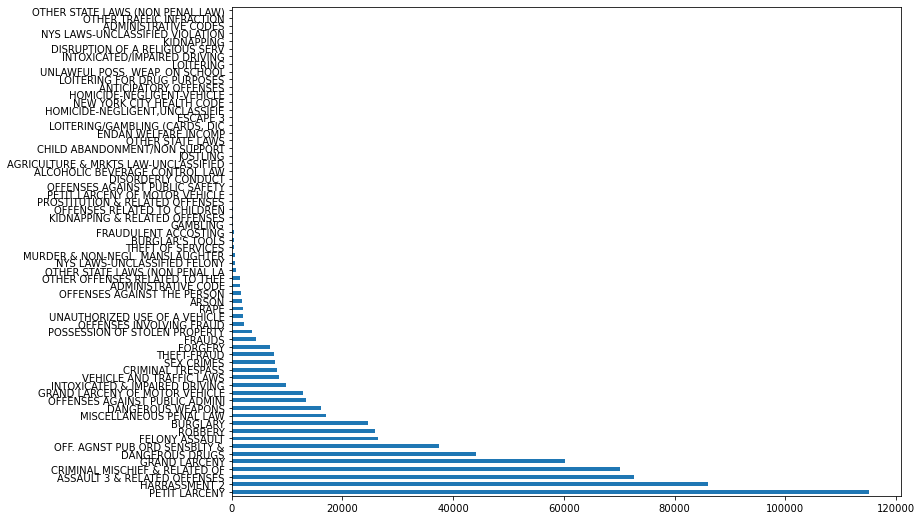

In [14]:
### BEGIN SOLUTION
calls_off = calls['OFNS_DESC'].value_counts().sort_values(ascending=False)
calls_off.plot.barh()

### END SOLUTION

### 3.2 Getting a Better Plot
The plot above can be messy as it plots all offenses. Plot only the offenses that has more than 10000 calls

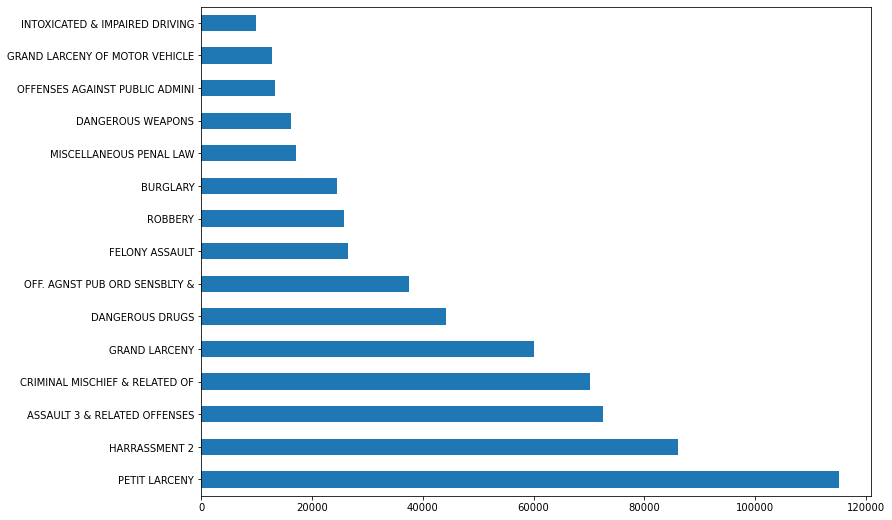

In [15]:
### BEGIN SOLUTION
calls_off[0:15].plot.barh()
### END SOLUTION

By contrast, the Seaborn library provides a specific function `countplot` built for plotting counts. It operates directly on the DataFrame itself i.e. there's no need to call `value_counts()` at all. This higher level approach makes it easier to work with. Use the y-label ("Crime Category"), x-label("Number of Calls") and title_of_plot("Number of Calls By Crime Type"

Text(0.5, 1.0, 'Number of Calls By Crime Type')

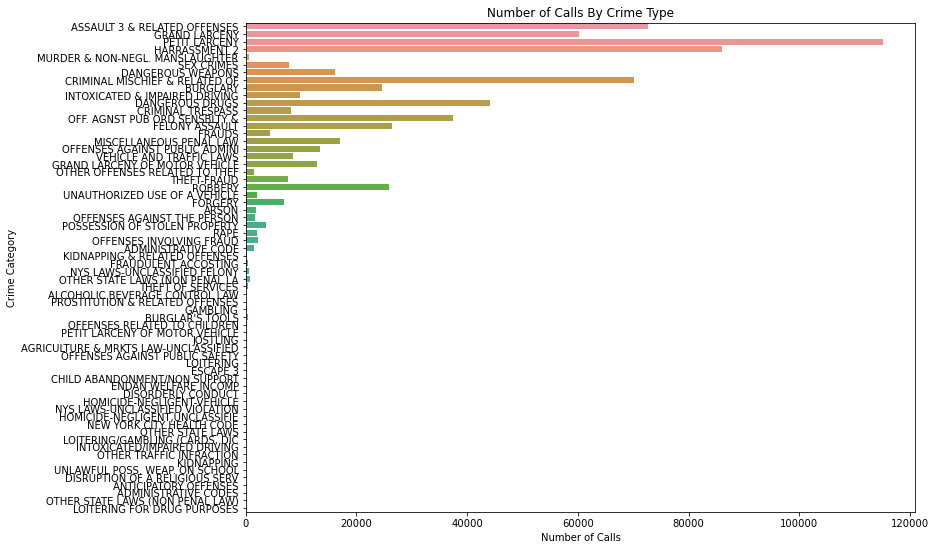

In [16]:
### BEGIN SOLUTION
pt = sns.countplot(data=calls, y='OFNS_DESC')
pt.set_ylabel('Crime Category')
pt.set_xlabel('Number of Calls')
pt.set_title('Number of Calls By Crime Type')

### END SOLUTION

You may note that the ordering might be different for the seaborn plot (as compared to pandas plot). If we want the same ordering that we had in the pandas plot, we can use the order parameter of the `countplot` method. It takes a list of strings corresponding to the axis to be ordered. By passing the index of the `value_counts`, you can get the order you want.

Text(0.5, 1.0, 'Number of Calls By Crime Type')

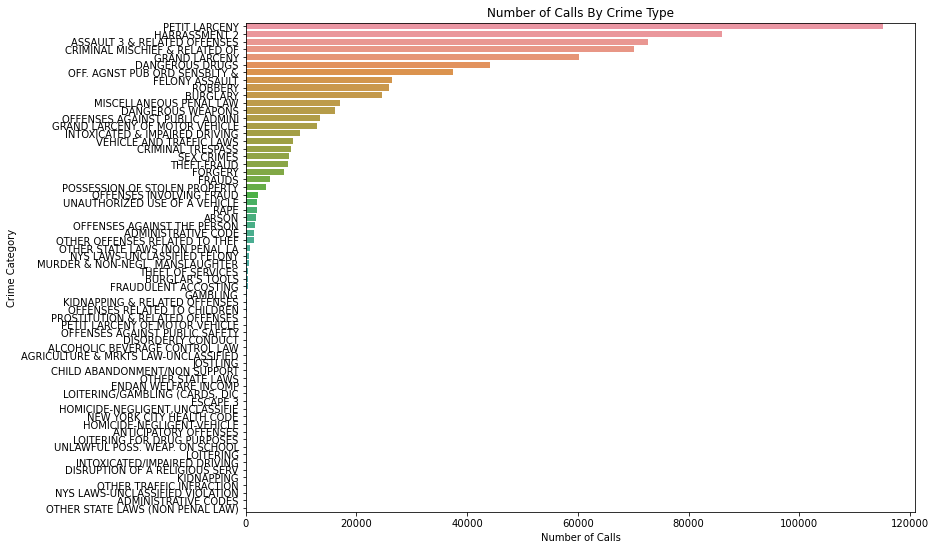

In [17]:
### BEGIN SOLUTION

pt = sns.countplot(data=calls, y='OFNS_DESC', order = calls['OFNS_DESC'].value_counts().index)
pt.set_ylabel('Crime Category')
pt.set_xlabel('Number of Calls')
pt.set_title('Number of Calls By Crime Type')

### END SOLUTION

Now we have a pretty bar plot with the bars ordered by size. Though `seaborn` appears to provide a superior plot from a aesthetic point of view, the `pandas` plotting library is also good to understand. You'll get practice using both libraries in the following questions.

## An Additional Note on Plotting in Jupyter Notebooks

You may have noticed that many of our code cells involving plotting end with a semicolon (;). This prevents any extra output from the last line of the cell that we may not want to see. Try adding this to your own code in the following questions!

### 3.3 making more plots

Now it is your turn to make some more plots using `pandas` and `seaborn`. Let's start by looking at the distribution of calls over days of the week.

The CMPLNT_FR_DT field contains the date of the event. We would like to add a new column to the DataFrame that includes Day of the week (DAY_OF_WEEK) that indicates the day of the week. This can help us analyze the crimes on a specific day of the week. For example, we can answer questions such as "what day of the week that a LARSON is likely to happen in NYC?"


Add a new column `DAY_OF_WEEK` into the `calls` dataframe that has the day string (eg. 'Sunday') for the corresponding value in CMPLNT_FR_DT. For example, if the first 3 values of `CMPLNT_FR_DT` are `['01/27/2006, '01/28/2006, '01/29/2006]`, then the first 3 values of the `DAY_OF_WEEK` column should be `["Friday", "Saturday", "Sunday"]`.

**Hint:** *Try using the [Series.map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) function on `calls["OFNS_DESC"]`.  Can you assign this to the new column `calls["DAY_OF_WEEK"]`?*

In [18]:
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
### BEGIN SOLUTION
calls['CMPLNT_FR_DT'] = pd.to_datetime(calls['CMPLNT_FR_DT'],errors = 'coerce')
calls['DAY_OF_WEEK'] = calls['CMPLNT_FR_DT'].dt.day_name()
calls.head()
### END SOLUTION

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,DAY_OF_WEEK
0,724718389,2014-09-04,17:25:00,09/04/2014,17:35:00,81.0,09/04/2014,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,NaN,40.685041,-73.921777,"(40.685040958, -73.921776995)",PATROL BORO BKLYN NORTH,NaN,25-44,WHITE,F,Thursday
1,191133903,2016-10-12,07:40:00,10/12/2016,07:45:00,121.0,10/12/2016,109,GRAND LARCENY,417.0,...,NaN,40.636991,-74.134093,"(40.63699139, -74.134092508)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE HISPANIC,F,Wednesday
2,720151206,2012-09-28,13:30:00,09/28/2012,14:00:00,41.0,10/19/2012,109,GRAND LARCENY,413.0,...,NaN,40.823876,-73.891863,"(40.823876276, -73.891862968)",PATROL BORO BRONX,NaN,45-64,WHITE HISPANIC,F,Friday
3,232242098,2015-03-24,15:45:00,NaN,NaN,46.0,03/24/2015,341,PETIT LARCENY,339.0,...,NaN,40.845707,-73.910398,"(40.845707148, -73.910398033)",PATROL BORO BRONX,NaN,<18,WHITE HISPANIC,F,Tuesday
4,708078702,2017-05-20,04:02:00,05/20/2017,04:09:00,109.0,05/20/2017,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,NaN,40.763992,-73.828426,"(40.763991557, -73.828425559)",PATROL BORO QUEENS NORTH,NaN,25-44,BLACK,M,Saturday


### 3.4 Seaborn plots

Create a `seaborn` plot that shows the number of calls for each day of the week. You may want to use of the `rotation` argument in `ax.set_xticklabels`, which rotates the labels by 90 degrees.

Text(0.5, 1.0, 'Number of Calls By Day of the Week')

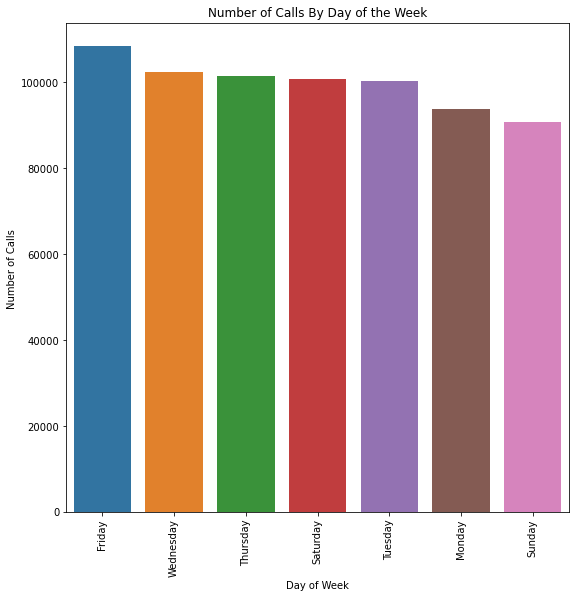

In [19]:
### BEGIN SOLUTION
plt.figure(figsize=(9,9))
pt = sns.countplot(data=calls, x='DAY_OF_WEEK', order = calls['DAY_OF_WEEK'].value_counts().index)
pt.set_xticklabels(pt.get_xticklabels(),rotation=90)
pt.set_ylabel('Number of Calls ')
pt.set_xlabel('Day of Week')
pt.set_title('Number of Calls By Day of the Week')

### END SOLUTION

Now, let's make the same plot using `pandas`. Construct a vertical bar plot with the count of the number of calls (entries in the table) for each day of the week **ordered by the day of the week** (eg. `Sunday`, `Monday`, ...). Do not use `sns` for this plot. Be sure that your axes are labeled and that your plot is titled.

**Hint:** *Given a series `s`, and an array `coolIndex` that has the same entries as in `s.index`, `s[coolIndex]` will return a copy of the series in the same order as `coolIndex`.*

Text(0.5, 1.0, 'Number of Calls By Day of the Week')

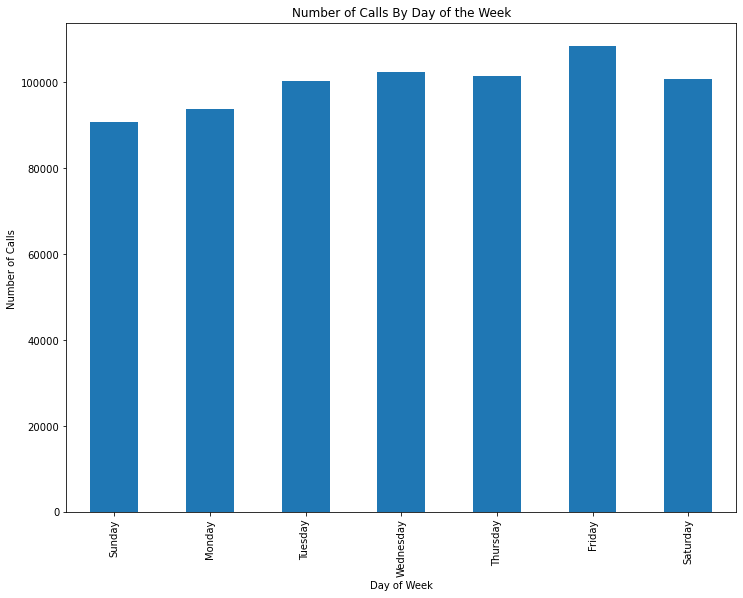

In [20]:
### BEGIN SOLUTION
pt = calls['DAY_OF_WEEK'].value_counts()[days]
pt.plot(kind='bar')
plt.ylabel('Number of Calls ')
plt.xlabel('Day of Week')
plt.title('Number of Calls By Day of the Week')
### END SOLUTION

## 3.5 What Day of the Week is more calls?

Is it true that weekdays generally have slightly more calls than Saturday or Sunday? What can you say about the difference?

##### BEGIN SOLUTION
Generally the weekdays have more crime reported than the weekends , Friday mostly. It can be infered that There is an increasing pattern starting from Sunday. This also implies that there are more calls on weekdays.

##### END SOLUTION

We can break down into some particular types of events to see their distribution. For example, let's make a bar plot for the OFNS_DESC "HARRASSMENT 2". Which day is the peak for "HARRASSMENT 2"?

This time, use `seaborn` to create a vertical bar plot of the number of total noise violations reported on each day of the week, again ordered by the days of the week starting with Sunday. Do not use `pandas` to plot.

**Hint:** *If you're stuck, use the code for the seaborn plot in above question as a starting point.*

Text(0.5, 1.0, 'Number of Calls By Day of the Week for Harrassment 2')

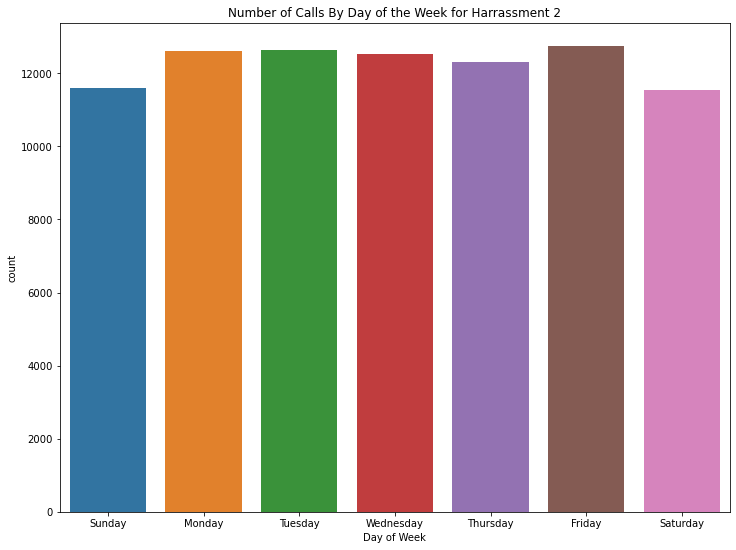

In [21]:
### BEGIN SOLUTION
harrassment2 = calls[calls['OFNS_DESC'] == 'HARRASSMENT 2']
pt=sns.countplot(x='DAY_OF_WEEK',data = harrassment2,order=days)
pt.set_xlabel('Day of Week')
pt.set_title('Number of Calls By Day of the Week for Harrassment 2')
### END SOLUTION

### 3.6 

Do you see anything interesting about the distribution of HARRASSMENT 2 calls over a week? Type a short answer below.
##### BEGIN SOLUTION
Friday still has the most Data. However the data is not of uniform distributtion. The data seems to be mostly the same with only a few minor spikes. Even if Friday has the most reported crimes, this is not the only time where the reports spike. 
##### END SOLUTION

### 3.7 More Plots

Let's look at a similar distribution but for a crime we have much more calls data about. In the cell below, create the same plot as you did in previous questions, but now looking at instances of the OFNS_DESC "BURGLARY" (instead of "HARRASSMENT 2"). Use either `pandas` or `seaborn` plotting as you desire.

Text(0.5, 1.0, 'Number of Calls By Day of the Week for Burglary')

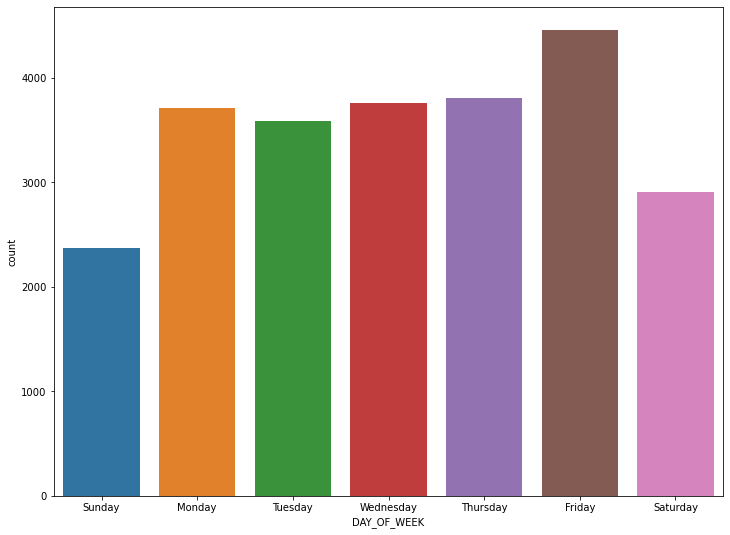

In [22]:
### BEGIN SOLUTION
burglary = calls[calls['OFNS_DESC']=='BURGLARY']
t=sns.countplot(x='DAY_OF_WEEK',data = burglary,order=days)
pt.set_xlabel('Day of Week')
pt.set_title('Number of Calls By Day of the Week for Burglary')
### END SOLUTION



### 3.8 time of events

Now let's look at the CMPLNT_TO_TM column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` dataframe. You should save the hour as an `int`. Then plot the frequency of each hour in the table (i.e., `value_counts()`) sorted by the hour of the day (i.e., `sort_index()`).

You will want to look into how to use:

* [Series.str.slice](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.slice.html#pandas.Series.str.slice) to select the substring.
* [Series.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) to change the type.

**Hint:** *The `str` helper member of a series can be used to grab substrings.  For example, `calls["CMPLNT_TO_TM"].str.slice(3,5)` returns the minute of each hour of the `CMPLNT_TO_TM`.*

Text(0, 0.5, 'Hour')

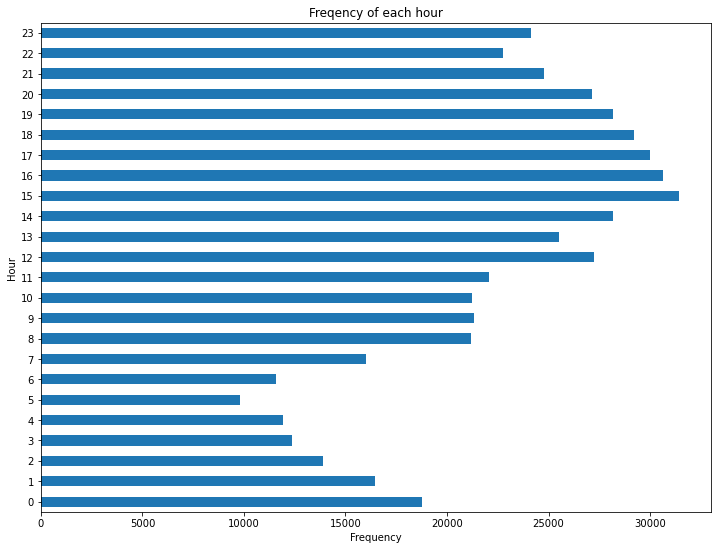

In [24]:
### BEGIN SOLUTION
calls = calls [pd.notnull(calls['CMPLNT_TO_TM'])]
calls['Hour'] = calls['CMPLNT_TO_TM'].str.slice(0,2)
calls['Hour'] = calls['Hour'].astype('int64')
calls['Hour'].replace(24,0,inplace = True)
hr_calls = calls['Hour'].value_counts()
hrs = list(calls['Hour'].unique())
hrs.sort()
hr_calls = hr_calls[hrs]
pt = hr_calls.plot.barh(title = 'Freqency of each hour')
pt.set_xlabel('Frequency')
pt.set_ylabel('Hour')
# 0- 23 hours meaning from 12 Am to 11:59 pm so 0 hour would be 12 AM .. 1 - 1AM ... 23 hours = 11 PM
### END SOLUTION

Create a pandas bar plot showing the number of BURGLARY crimes committed at each hour of the day. Use the labels
* ax.set_xlabel("Hour of the Day")
* ax.set_ylabel("Number of Calls")
* ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23')]

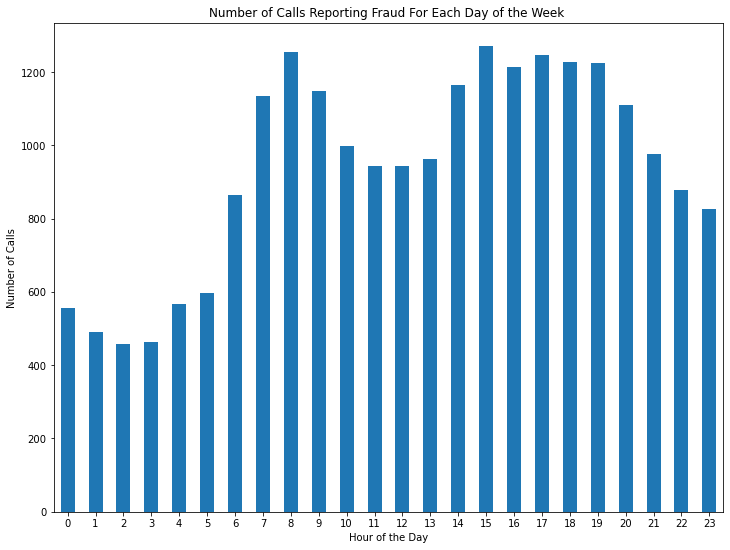

In [25]:
### BEGIN SOLUTION
burg_hour = calls[calls['OFNS_DESC']=='BURGLARY']
burg_hourc = burg_hour['Hour'].value_counts()
burg_hourc = burg_hourc[hrs]
ax = burg_hourc.plot.bar(title = 'Number of Calls Reporting Fraud For Each Day of the Week ')
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Calls")
ax.set_xticklabels(hrs,rotation=0)
### END SOLUTION

### 3.9 More plots

In the cell below, create a seaborn plot of the same data. Again, make sure you provide axes labels and a title for your plot.

Text(0.5, 1.0, 'Number of Calls Reporting Fraud For Each Day of the Week')

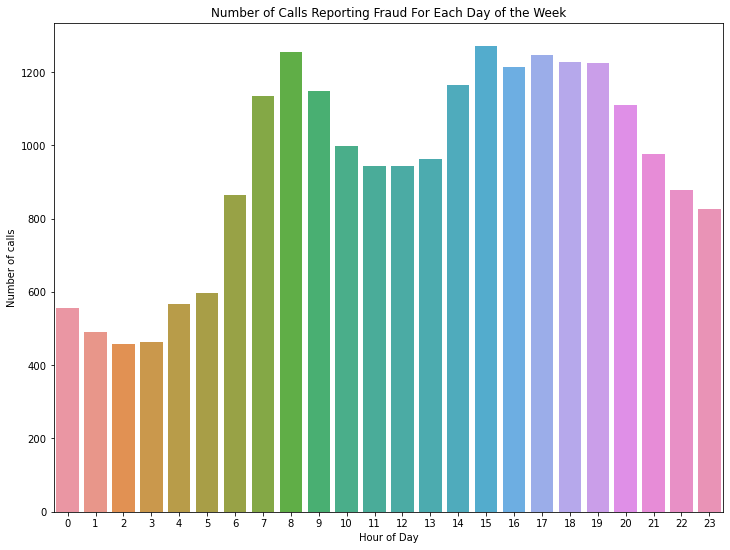

In [26]:
### BEGIN SOLUTION
ax = sns.countplot(x='Hour',data = burg_hour,order=hrs)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of calls')
ax.set_title('Number of Calls Reporting Fraud For Each Day of the Week')
### END SOLUTION

### 3.8 Spike in burglary?

According to your plots, is there a spike in calls reporting BURGLARY at any particular time? If so, Do you trust that this spike is legitimate, or could there be an issue with our data? Explain your reasoning in 1-2 sentences below.

#### BEGIN SOLUTION
There is a Spike around 7AM and another spike at around 3PM (15 hours). This is trustworthy since There are big crowds during the moring rush and lunch break. These times are where many people are traveling which is a perfect time for a crime to happen as there is so much commotion in NY where no one could realise. 

#### END SOLUTION

In the cell below, we generate a boxplot which examines the hour of day of each crime broken down by the `OFNS_DESC` value.  To construct this plot we used the [DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) documentation.

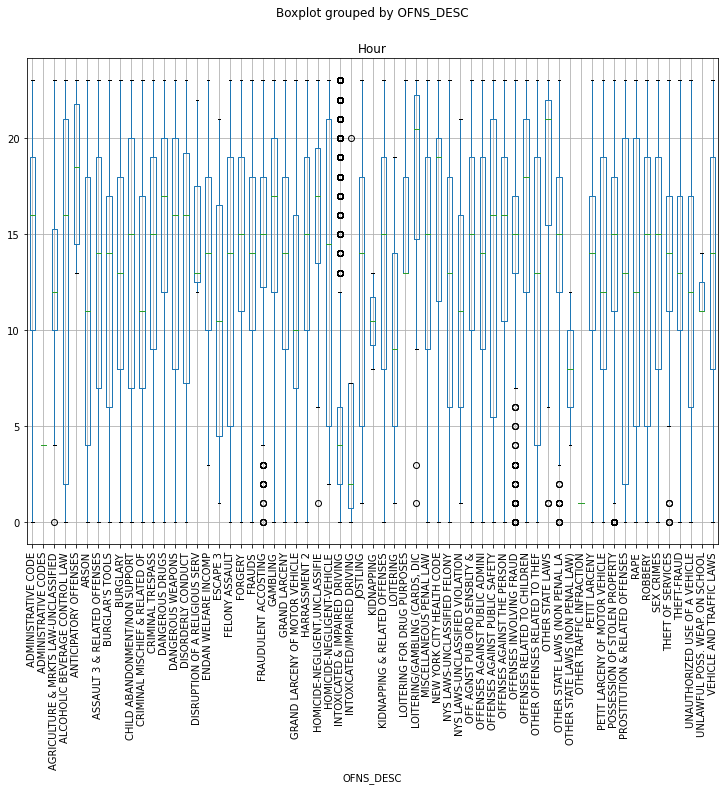

In [27]:
calls.boxplot(column="Hour", by='OFNS_DESC', rot=90);

While the pandas boxplot is informative, we can use seaborn to create a more visually-appealing plot. Using seaborn, regenerate a better box plot. See either the textbook (https://www.textbook.ds100.org/ch/06/viz_quantitative.html) or the [seaborn boxplot documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Looking at your plot, which crime type appears to have the largest interquartile range? Put your results into `answer` as a string.

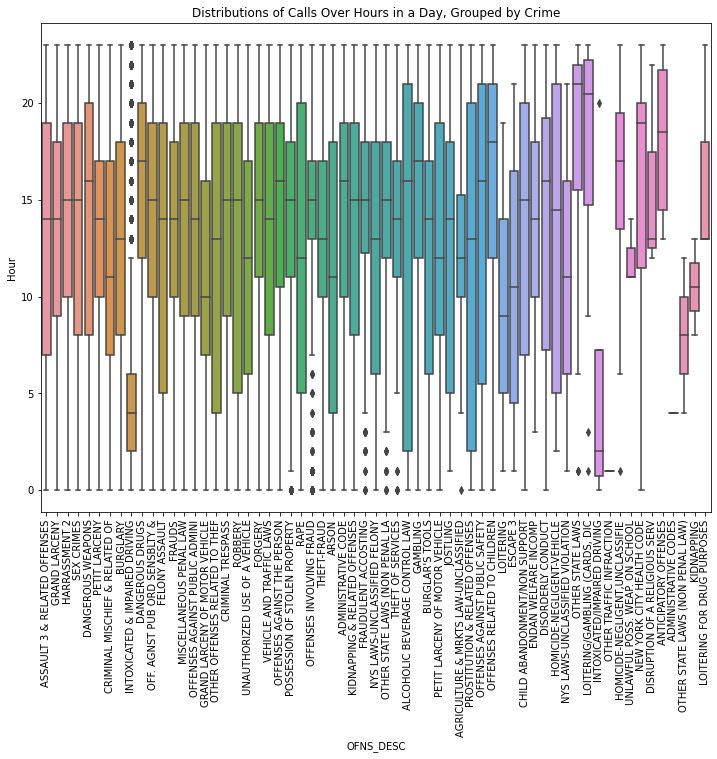

In [28]:
# Todo: Make a boxplot with seaborn
### BEGIN SOLUTION
ax = sns.boxplot(x='OFNS_DESC',y='Hour',data=calls)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Distributions of Calls Over Hours in a Day, Grouped by Crime");
answer = "Alcoholic Beverage Control Law"
### END SOLUTION

### 3.9 - Visualization of crimes on a Map of NYC
finally we attempt to visualize the crimes committed in NYC on a Map. First we need to installing some mapping software. run the cell below to install folium package for mapping software.

In [29]:
!pip install --upgrade folium

Requirement already up-to-date: folium in /Users/krishnapatel/opt/anaconda3/lib/python3.8/site-packages (0.11.0)


In [31]:
### Plot the maps for BURGLARY in NYC
### if it takes too much time or map does not show up, try plotting a subset of the data set of for a specific crime

### BEGIN SOLUTION
import folium 
import folium.plugins
burg_nyc = calls[calls['OFNS_DESC']=='BURGLARY']
burg_nyc = burg_nyc[pd.notnull(burg_nyc['Latitude'])&pd.notnull(burg_nyc['Longitude'])]

nycmap = folium.Map(location = (40.785091,-73.968285),zoom_start=8)
loc = burg_nyc[['Latitude','Longitude']].values
heatmap = folium.plugins.HeatMap(loc,radius=10)
nycmap.add_child(heatmap)
### END SOLUTION

## Congratulations !!!

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> Output:</b> Please remove all output from your notebook prior to submission<br>
<b> File Name:</b> Please name the file as your_section_your_netID_Lab3.jpynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; Lab3 <br>
<b>Warning:</b> Failure to follow directions may result in loss of points.<br>
</div>

@2020 A.D. Gunawardena. Many people contributed to this lab including Liqin Long. Many credits go to Josh Hug, and Berkeley Data Science Group for their contributions to the original version.